<a href="https://colab.research.google.com/github/Tabook22/ComputerVision/blob/main/Automatic_Number_Plate_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source: https://www.youtube.com/watch?v=NApYP_5wlKY

**1- Install and Import Dependencies**

In [2]:
!pip install opencv-python

In [4]:
!pip install torch

In [3]:
!pip install easyocr imutils numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 16.4 MB/s eta 0:00:00


In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr


2- Read images, grayscale and blure

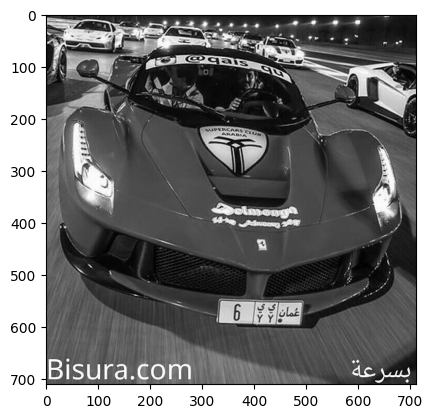

In [41]:
img=cv2.imread('cp4.jpg')
#converting color to gray
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

**3- Apply filter and dind edges for localization**

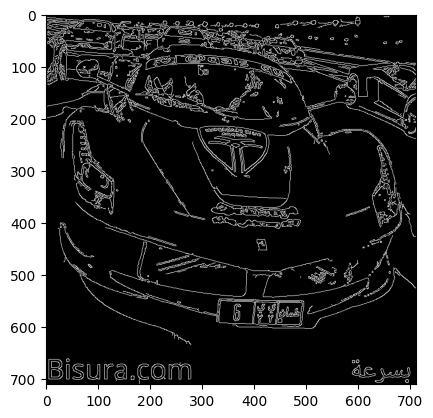

In [42]:
bfilter=cv2.bilateralFilter(gray, 11,17,17) #Noise reduction
edged =cv2.Canny(bfilter,30,200) # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


**Find Contours and Apply Mask**

In [43]:
#Going through the image and try to find the shape
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [44]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx)==4:
    location=approx
    break

In [45]:
location

array([[[335, 552]],

       [[399, 553]],

       [[396, 594]],

       [[334, 593]]], dtype=int32)

In [46]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img, mask=mask)

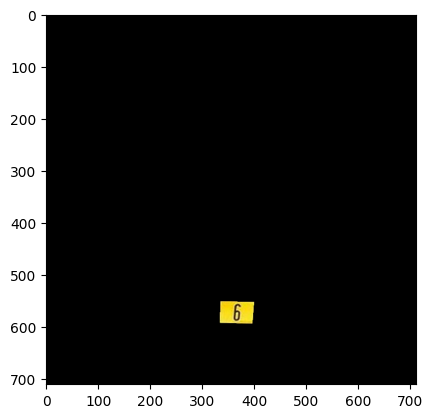

In [47]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [48]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x), np.min(y))
(x2,y2)=(np.max(x), np.max(y))
cropped_image=gray[x1:x2+1,y1:y2+1]

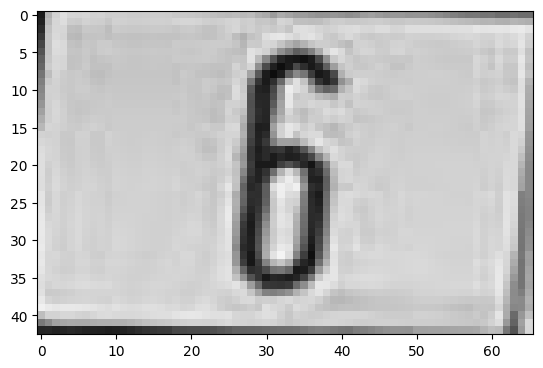

In [49]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

5- Use Easy OCR to Read Text

In [50]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

[([[23, 3], [43, 3], [43, 39], [23, 39]], '6', 0.9993017938973168)]

**6- Render Result**

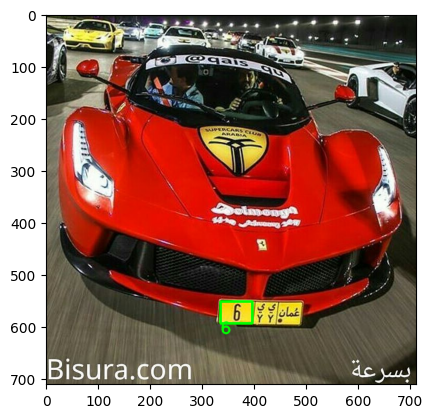

In [54]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res=cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))